<a href="https://colab.research.google.com/github/NiyonshutiDavid/api_endpoint/blob/main/linear_regression/multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Dataset Information ---
This notebook uses a sample dataset. For a real application, a richer dataset is needed.

First few rows of the dataset:
   Year Country         Region  Crop_Type  Average_Temperature_C  \
0  2001   India    West Bengal       Corn                   1.55   
1  2024   China          North       Corn                   3.23   
2  2001  France  Ile-de-France      Wheat                  21.11   
3  2001  Canada       Prairies     Coffee                  27.85   
4  1998   India     Tamil Nadu  Sugarcane                   2.19   

   Total_Precipitation_mm  CO2_Emissions_MT  Crop_Yield_MT_per_HA  \
0                  447.06             15.22                 1.737   
1                 2913.57             29.82                 1.737   
2                 1301.74             25.75                 1.719   
3                 1154.36             13.91                 3.890   
4                 1627.48             11.81                 1.080   

   Extreme_Weather_Events  

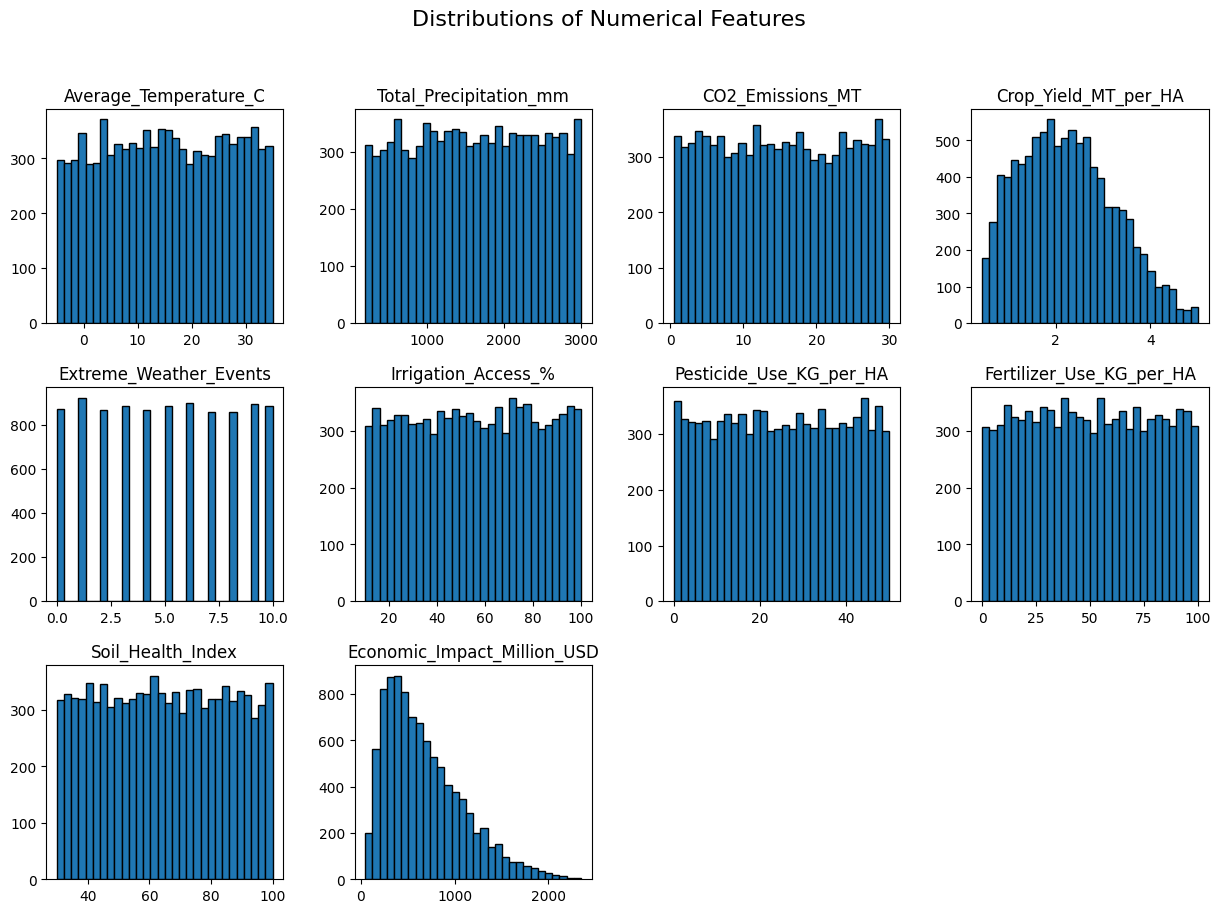


Correlation Matrix:


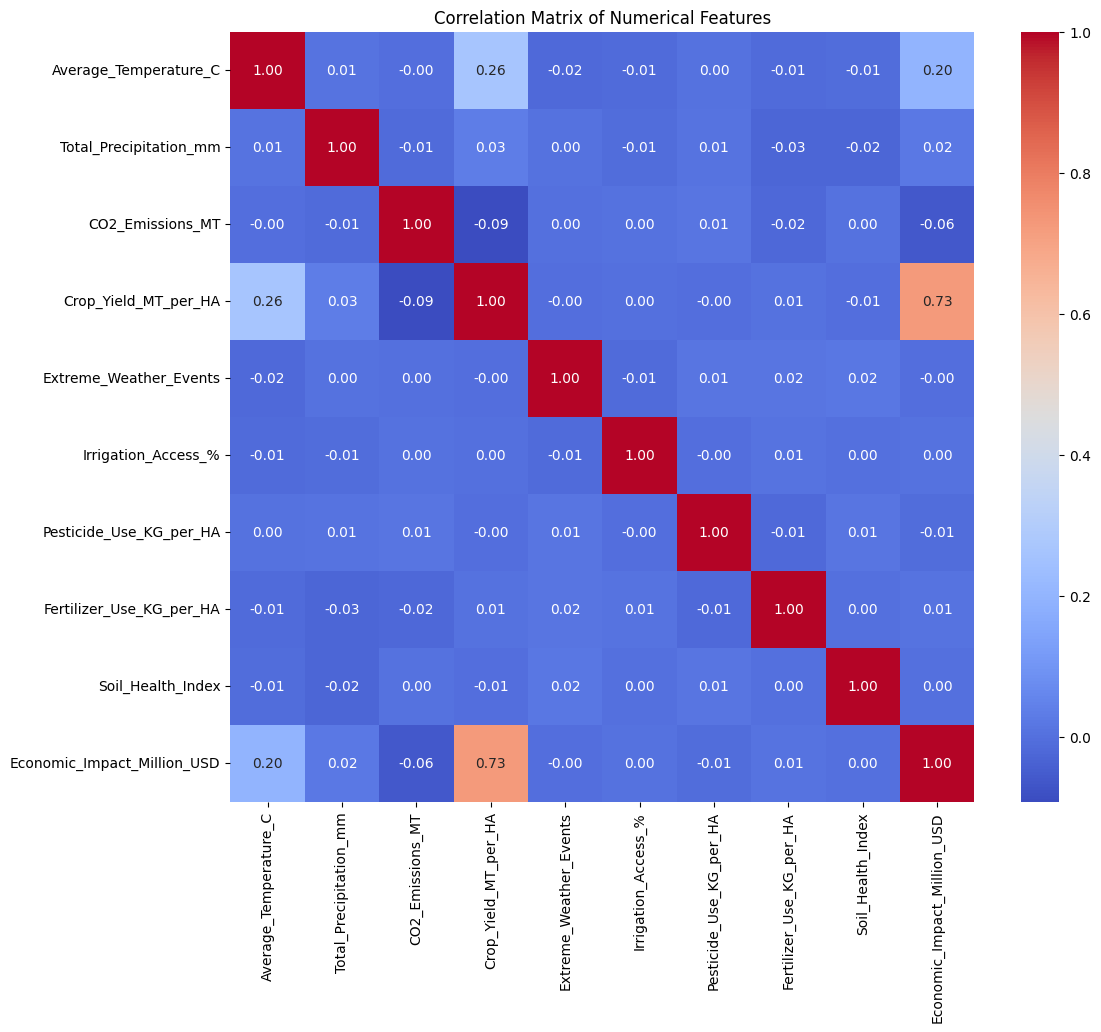


Model Evaluation:

Linear Regression:
  MSE: 79961.63
  R-squared: 0.51

Decision Tree Regression:
  MSE: 79515.09
  R-squared: 0.51

Random Forest Regression:
  MSE: 78833.57
  R-squared: 0.51


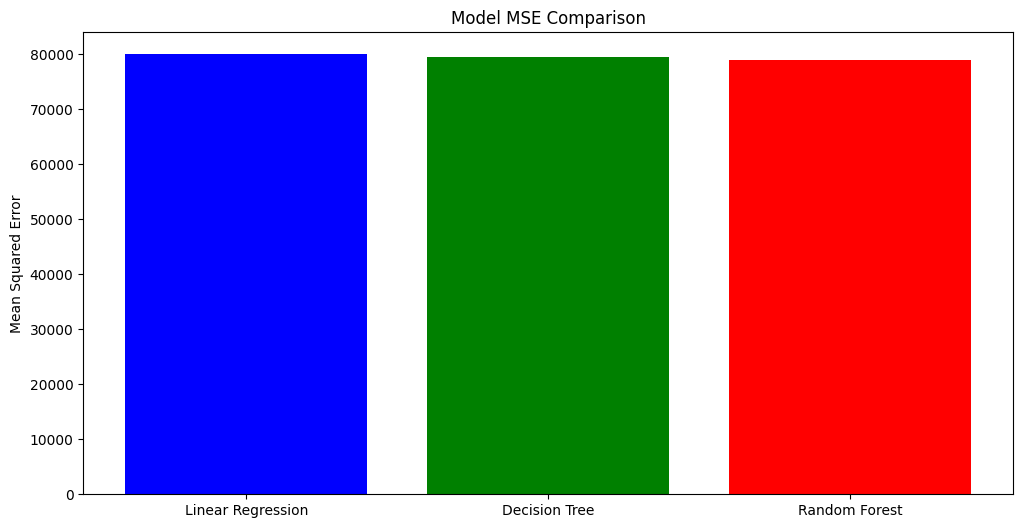


Best Model (based on MSE): Random Forest saved as 'economic_impact_model.pkl'

Predicted Economic Impact for sample data point: 1107.42 Million USD


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [8]:
# --- Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib

print("--- Dataset Information ---")
print("This notebook uses a sample dataset. For a real application, a richer dataset is needed.")

# Load Data (Replace with your actual data loading - assuming you saved the preview as a CSV)
data = pd.read_csv("climate_change_impact_on_agriculture_2024.csv")

# Print first few rows and dataset description
print("\nFirst few rows of the dataset:")
print(data.head())
print("\nDataset Description:")
print(data.describe())

# Check for missing values
print("\nMissing Values in Dataset:")
print(data.isnull().sum())
print("\n")

# --- 2. Data Cleaning and Preprocessing ---
data = data[data.Year != 2024]
data = data.reset_index(drop=True)

numerical_cols = ['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA',
                  'Extreme_Weather_Events', 'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA',
                  'Fertilizer_Use_KG_per_HA', 'Soil_Health_Index', 'Economic_Impact_Million_USD']
data[numerical_cols] = data[numerical_cols].apply(pd.to_numeric, errors='coerce')
data = data.dropna(subset=numerical_cols)

categorical_cols = ['Country', 'Region', 'Crop_Type', 'Adaptation_Strategies']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# --- 3. Exploratory Data Analysis (EDA) ---
print("\nDescriptive Statistics of Numerical Features:")
print(data[numerical_cols].describe())

# Visualizing all numerical features
data[numerical_cols].hist(figsize=(15, 10), bins=30, edgecolor='black', grid=False, layout=(3, 4))
plt.suptitle('Distributions of Numerical Features', fontsize=16)
plt.show()

# Correlation Matrix
print("\nCorrelation Matrix:")
plt.figure(figsize=(12, 10))
sns.heatmap(data[numerical_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# --- 4. Model Training and Evaluation ---
X = data.drop('Economic_Impact_Million_USD', axis=1)
y = data['Economic_Impact_Million_USD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for Decision Tree
param_grid_dt = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
grid_search_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_dt, cv=5, scoring='neg_mean_squared_error')
grid_search_dt.fit(X_train, y_train)
best_tree_model = grid_search_dt.best_estimator_

# Hyperparameter tuning for Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)
best_forest_model = grid_search_rf.best_estimator_

# Train Models
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

tree_model = best_tree_model
tree_model.fit(X_train, y_train)

forest_model = best_forest_model
forest_model.fit(X_train, y_train)

# Model Evaluation
linear_y_pred = linear_model.predict(X_test)
tree_y_pred = tree_model.predict(X_test)
forest_y_pred = forest_model.predict(X_test)

linear_mse = mean_squared_error(y_test, linear_y_pred)
tree_mse = mean_squared_error(y_test, tree_y_pred)
forest_mse = mean_squared_error(y_test, forest_y_pred)

linear_r2 = r2_score(y_test, linear_y_pred)
tree_r2 = r2_score(y_test, tree_y_pred)
forest_r2 = r2_score(y_test, forest_y_pred)

print("\nModel Evaluation:")
print("\nLinear Regression:")
print(f"  MSE: {linear_mse:.2f}")
print(f"  R-squared: {linear_r2:.2f}")

print("\nDecision Tree Regression:")
print(f"  MSE: {tree_mse:.2f}")
print(f"  R-squared: {tree_r2:.2f}")

print("\nRandom Forest Regression:")
print(f"  MSE: {forest_mse:.2f}")
print(f"  R-squared: {forest_r2:.2f}")

# Plotting learning curves
plt.figure(figsize=(12, 6))
plt.bar(['Linear Regression', 'Decision Tree', 'Random Forest'], [linear_mse, tree_mse, forest_mse], color=['blue', 'green', 'red'])
plt.title("Model MSE Comparison")
plt.ylabel("Mean Squared Error")
plt.show()

# --- 8. Save the Best Model ---
models = {
    'Linear Regression': linear_mse,
    'Decision Tree': tree_mse,
    'Random Forest': forest_mse
}
best_model_name = min(models, key=models.get)
if best_model_name == 'Linear Regression':
    best_model = linear_model
elif best_model_name == 'Decision Tree':
    best_model = tree_model
else:
    best_model = forest_model
joblib.dump(best_model, 'economic_impact_model.pkl')
print(f"\nBest Model (based on MSE): {best_model_name} saved as 'economic_impact_model.pkl'")

# Predict a single data point
sample_data = X_test.iloc[0].values.reshape(1, -1)
prediction = best_model.predict(sample_data)
print(f"\nPredicted Economic Impact for sample data point: {prediction[0]:.2f} Million USD")


# --- Optional: Print Coefficients for Linear Regression ---
if best_model_name == "Linear Regression":
    print("\nLinear Regression Coefficients:")
    print(pd.DataFrame(linear_model.coef_, X.columns, columns=['Coefficient']))
    print(f"Linear Regression Intercept: {linear_model.intercept_:.2f}")


In [9]:
# Predict a single data point
sample_data = X_test.iloc[0]
print("\nSingle Entry Data Point:")
print(sample_data)
sample_data = sample_data.values.reshape(1, -1)
prediction = best_model.predict(sample_data)
print(f"\nPredicted Economic Impact for sample data point: {prediction[0]:.2f} Million USD")

# Print accuracy and evaluation metrics for best model
print("\nBest Model Performance:")
print(f"MSE: {models[best_model_name]:.2f}")
print(f"R-squared: {r2_score(y_test, best_model.predict(X_test)):.2f}")


Single Entry Data Point:
Year                                                2006
Average_Temperature_C                              32.45
Total_Precipitation_mm                           2580.32
CO2_Emissions_MT                                   10.97
Crop_Yield_MT_per_HA                                3.79
                                                  ...   
Crop_Type_Wheat                                    False
Adaptation_Strategies_Drought-resistant Crops       True
Adaptation_Strategies_No Adaptation                False
Adaptation_Strategies_Organic Farming              False
Adaptation_Strategies_Water Management             False
Name: 251, Length: 65, dtype: object

Predicted Economic Impact for sample data point: 1107.42 Million USD

Best Model Performance:
MSE: 78833.57


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


R-squared: 0.51
